In [1]:
import mysql.connector as sql
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# Import around model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
# Balancing 
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
#Explaining 
# import shap
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Optimize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
#Xgboost vie
import xgboost as xgb

#pickle 
import pickle

In [3]:
#Fonction pour regarder mes valeurs manquantes
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [4]:
def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score


In [5]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='root',db='retardavion')

In [6]:
janvier = pd.read_sql_query("SELECT * FROM janvier2016" ,conn)

C:\Users\simplon\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
janvier

,index,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,0,2016,1,1,6,3,2016-01-06,AA,19805,AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,1,2016,1,1,7,4,2016-01-07,AA,19805,AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2,2016,1,1,8,5,2016-01-08,AA,19805,AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,3,2016,1,1,9,6,2016-01-09,AA,19805,AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,4,2016,1,1,10,7,2016-01-10,AA,19805,AA,...,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445822,445822,2016,1,1,31,7,2016-01-31,WN,19393,WN,...,2,0.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,None
445823,445823,2016,1,1,31,7,2016-01-31,WN,19393,WN,...,2,5.0,0.0,9.0,0.0,12.0,NaN,NaN,NaN,None
445824,445824,2016,1,1,31,7,2016-01-31,WN,19393,WN,...,6,28.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,None
445825,445825,2016,1,1,31,7,2016-01-31,WN,19393,WN,...,2,0.0,0.0,24.0,0.0,0.0,NaN,NaN,NaN,None


In [8]:
missing_zero_values_table(janvier)

Your selected dataframe has 66 columns and 445827 Rows.
There are 27 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Unnamed: 64,0,445827,100.0,445827,100.0,object
LONGEST_ADD_GTIME,0,443275,99.4,443275,99.4,float64
TOTAL_ADD_GTIME,0,443275,99.4,443275,99.4,float64
FIRST_DEP_TIME,0,443275,99.4,443275,99.4,float64
CANCELLATION_CODE,0,434162,97.4,434162,97.4,object
LATE_AIRCRAFT_DELAY,36212,374945,84.1,411157,92.2,float64
SECURITY_DELAY,70583,374945,84.1,445528,99.9,float64
NAS_DELAY,33238,374945,84.1,408183,91.6,float64
WEATHER_DELAY,67071,374945,84.1,442016,99.1,float64
CARRIER_DELAY,32994,374945,84.1,407939,91.5,float64


In [9]:
janvier.DEP_DEL15.value_counts()

0.0    363300
1.0     71054
Name: DEP_DEL15, dtype: int64

In [55]:
data = janvier.copy()

# Baseline

In [56]:
#We drop column with only one value they won't do thing in our model , and dataleakage
data = data.drop(columns = ["FLIGHTS","YEAR","ARR_DELAY"])

In [57]:
#we drop nan on the target 
data = data[~data["ARR_DEL15"].isna()]

In [58]:
#for now we drop column with too much missing value 
missing_table = missing_zero_values_table(data)
data = data.drop(columns = missing_table.index.values[:10])

Your selected dataframe has 63 columns and 433298 Rows.
There are 10 columns that have missing values.


In [59]:
#We drop columns that have no pertincance in our case 
#( the goal is to predict if flight will be late if Cancel and divert are atypic situation)
data = data.drop(columns = ["CANCELLED","DIVERTED"])

In [60]:
data_baseline = data.select_dtypes(['float64','int64'])

In [61]:
data_baseline = data_baseline.drop(columns = ["index"])

In [62]:
data_baseline = data_baseline.drop(columns = ["ORIGIN_AIRPORT_ID","ORIGIN_AIRPORT_SEQ_ID","AIRLINE_ID","ORIGIN_CITY_MARKET_ID","ORIGIN_STATE_FIPS","ORIGIN_WAC","DEST_AIRPORT_ID","DEST_AIRPORT_SEQ_ID",
                                              "DEST_AIRPORT_SEQ_ID","DEST_CITY_MARKET_ID","DEST_CITY_MARKET_ID","DEST_STATE_FIPS","WHEELS_ON","WHEELS_OFF","ARR_TIME","CRS_ARR_TIME","ARR_DELAY_GROUP"
                                              ,"ARR_DELAY_NEW","AIR_TIME","ACTUAL_ELAPSED_TIME","CRS_ELAPSED_TIME","DEP_DELAY_NEW","CRS_DEP_TIME","TAXI_IN"])

In [63]:
data_baseline

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,DEST_WAC,DEP_TIME,DEP_DELAY,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,ARR_DEL15,DISTANCE,DISTANCE_GROUP
0,1,1,6,3,43,43,1057.0,-3.0,0.0,-1.0,15.0,0.0,986.0,4
1,1,1,7,4,43,43,1056.0,-4.0,0.0,-1.0,14.0,0.0,986.0,4
2,1,1,8,5,43,43,1055.0,-5.0,0.0,-1.0,21.0,0.0,986.0,4
3,1,1,9,6,43,43,1102.0,2.0,0.0,0.0,13.0,0.0,986.0,4
4,1,1,10,7,43,43,1240.0,100.0,1.0,6.0,20.0,1.0,986.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445822,1,1,31,7,163,91,1305.0,0.0,0.0,0.0,15.0,1.0,451.0,2
445823,1,1,31,7,1094,91,1947.0,17.0,1.0,1.0,11.0,1.0,451.0,2
445824,1,1,31,7,2225,41,827.0,37.0,1.0,2.0,11.0,1.0,1440.0,6
445825,1,1,31,7,2899,91,1427.0,-3.0,0.0,-1.0,12.0,1.0,368.0,2


In [64]:
data_baseline.columns

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM', 'DEST_WAC',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT',
       'ARR_DEL15', 'DISTANCE', 'DISTANCE_GROUP'],
      dtype='object')

In [65]:
data_baseline = data_baseline.drop(columns =['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM', 'DEST_WAC','DEP_TIME',
       'DEP_DEL15', 'DEP_DELAY_GROUP','DISTANCE_GROUP',"TAXI_OUT"] )

In [66]:
X = data_baseline.drop(columns = "ARR_DEL15")

In [67]:
y = data_baseline["ARR_DEL15"]

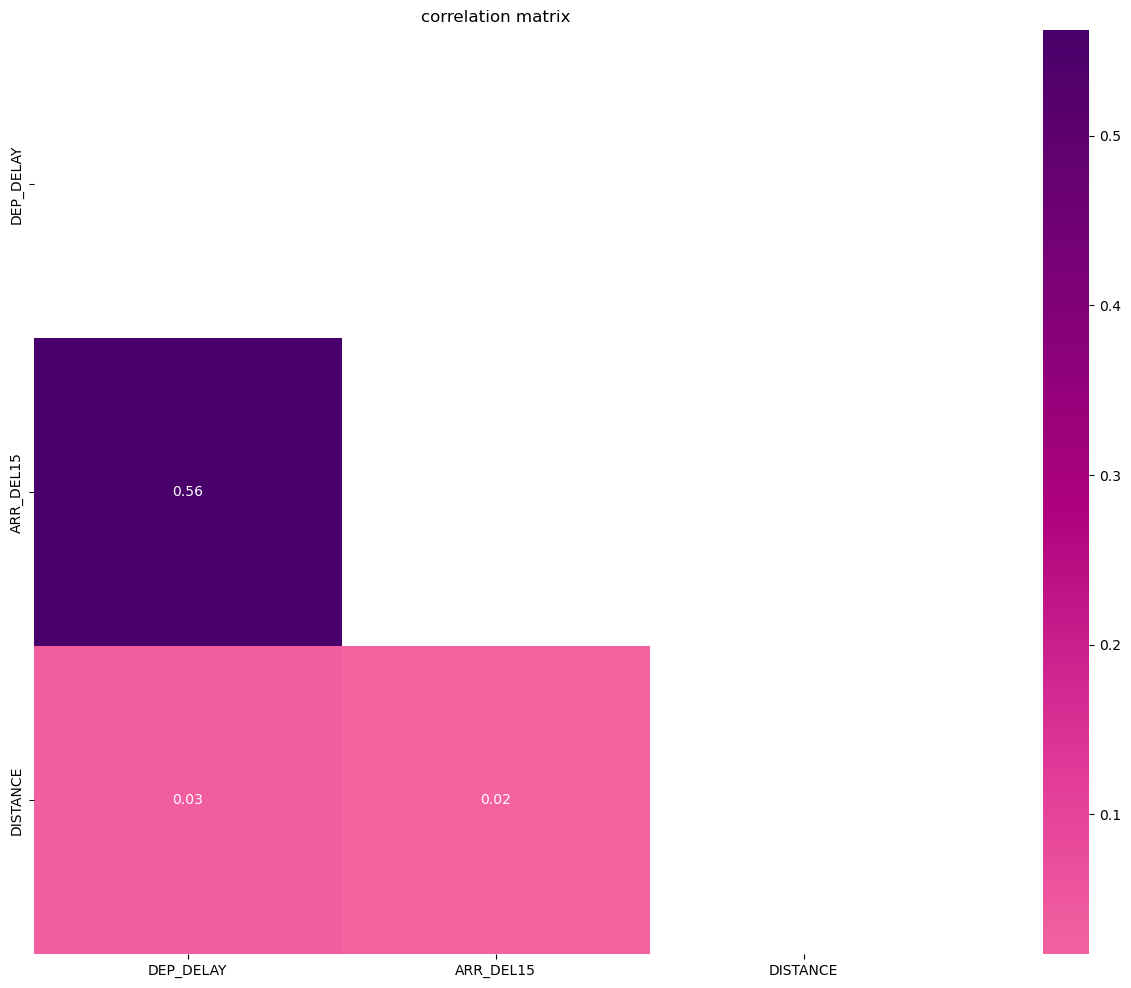

In [68]:
matrix =data_baseline.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="RdPu").set(title="correlation matrix")
plt.show()

In [69]:
imp = SimpleImputer(strategy='mean')

In [70]:
for i in X.columns:
    X[i] = imp.fit_transform(X[i].values.reshape(-1, 1) )

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41,stratify = y)

In [72]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)

RandomUnderSampler(random_state=0)

In [73]:
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [74]:
X_test.to_pickle("X_test.pkl")

In [75]:
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_resampled, y_resampled)

In [76]:
target_names = ['pas retard', 'retard']

In [77]:
# y_pred = neigh.predict(X_test)

In [78]:
# print(classification_report(y_test, y_pred, target_names=target_names))

In [79]:
model = xgb.XGBClassifier()


In [80]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [81]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [82]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96    108725
         1.0       0.89      0.68      0.77     21265

    accuracy                           0.93    129990
   macro avg       0.92      0.83      0.87    129990
weighted avg       0.93      0.93      0.93    129990

[[106965   1760]
 [  6875  14390]]


In [83]:
filename = 'XGBaseline_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [84]:
model.save_model('xgb_model.json')

In [85]:
X_line = X_test.iloc[[0]]

In [86]:
X_line.columns

Index(['DEP_DELAY', 'DISTANCE'], dtype='object')

In [87]:
datall = pd.read_pickle("data_brut.pkl")

In [88]:
datall.ORIGIN_STATE_NM.nunique()

52

In [89]:
datall.FL_NUM


0           43
1           43
2           43
3           43
4           43
          ... 
460944    1077
460945    1345
460946    1176
460947     865
460948    6775
Name: FL_NUM, Length: 5579917, dtype: int64

In [90]:
datall.FL_DATE = pd.to_datetime(datall.FL_DATE)

In [91]:
datall.ORIGIN_CITY_NAME.nunique()

308

In [92]:
choose = datall.loc[(datall['MONTH'] == 3) & (datall['DAY_OF_MONTH'] == 22) & (datall['FL_NUM'] == 1176)]

In [93]:
choose.ORIGIN_CITY_NAME.nunique()

2

In [94]:
datall.to_pickle("data_brut.pkl")

In [95]:
import pymysql


In [96]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root', passwd='root', db='retardavion')

In [97]:
df_pred = pd.read_pickle("./Model/X_test.pkl")

In [98]:
df_pred

,DEP_TIME,DEP_DELAY,DISTANCE
114340,2019.0,-6.0,1222.0
380119,1055.0,0.0,672.0
229484,1855.0,5.0,200.0
37963,455.0,-5.0,1258.0
174278,727.0,-9.0,110.0
...,...,...,...
51233,701.0,1.0,453.0
21871,653.0,-2.0,919.0
134461,1533.0,-2.0,236.0
372590,1402.0,-8.0,1166.0


In [101]:
janvier.columns


Index(['index', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY'

In [105]:
janvier["ORIGIN_STATE_NM"].unique()

array(['Texas', 'Michigan', 'Washington', 'New York', 'California',
       'Illinois', 'Arizona', 'Missouri', 'Florida', 'Colorado', 'Hawaii',
       'Nevada', 'Utah', 'U.S. Virgin Islands', 'Massachusetts',
       'Oklahoma', 'Pennsylvania', 'North Carolina', 'Virginia',
       'Georgia', 'Tennessee', 'Wyoming', 'New Jersey', 'Puerto Rico',
       'New Mexico', 'Louisiana', 'Indiana', 'Oregon', 'Maryland',
       'Minnesota', 'Wisconsin', 'Iowa', 'Nebraska', 'Kentucky', 'Ohio',
       'Connecticut', 'Idaho', 'Alaska', 'Rhode Island', 'Kansas',
       'Maine', 'South Carolina', 'Alabama', 'Vermont', 'North Dakota',
       'Mississippi', 'Montana', 'Arkansas', 'South Dakota',
       'West Virginia', 'U.S. Pacific Trust Territories and Possessions',
       'New Hampshire'], dtype=object)